In [7]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "data/dogscats/"
arch=resnet50
workers=8
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# these variables are used for capturing results
los = []
acc = []

In [13]:
sz=64
bs=64
learnrate = 5e-3 #0.005

In [14]:
tfms = tfms_from_model(arch, sz)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=workers)

 88%|██████████████████████████████████████████████████████████▎       | 318/360 [00:40<00:05,  7.83it/s, loss=1.13]

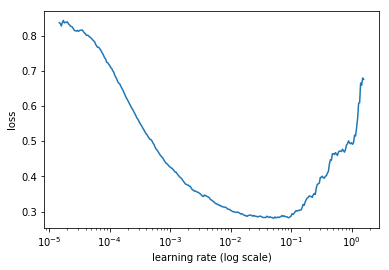

In [15]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=0)
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

 75%|█████████████████████████████████████████████████▌                | 270/360 [00:35<00:11,  7.68it/s, loss=3.36]

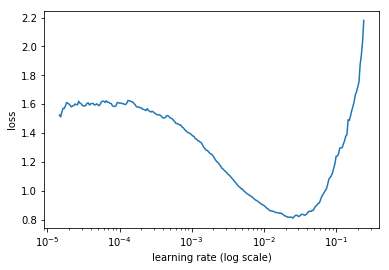

In [16]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=0.9)
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

In [21]:
sz=64
bs=512
learnrate = 1e-1 #0.1

In [18]:
tfms = tfms_from_model(arch, sz)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=workers)

epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.586918   30.771241  0.5       


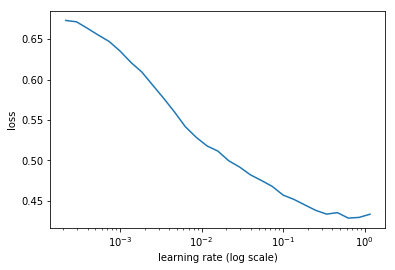

In [19]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=0)
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

 96%|██████████████████████████████████████████████████████████████████▉   | 43/45 [00:51<00:02,  1.20s/it, loss=15]

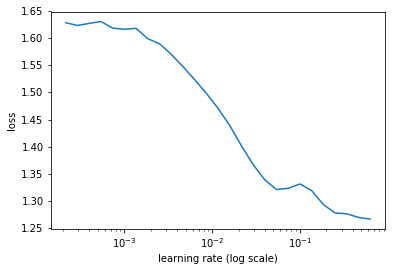

In [20]:
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=0.9)
# Finding the learning rate
lrf=learn.lr_find()
# Plotting the learning rate
learn.sched.plot()

In [22]:
for dropout in dropouts:
    learn = ConvLearner.pretrained(arch, data, precompute=False, ps=dropout)
    
    print('Dropout Rate:',dropout)
    %time fit_array = learn.fit(learnrate, 3, cycle_len=1, cycle_mult=2)
    accuracy = fit_array[1]
    loss = fit_array[0][0]
    acc.append(accuracy)
    los.append(loss)

Dropout Rate: 0.0


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.336639   0.255974   0.896     
    1      0.24562    0.219197   0.9075                                                                             
    2      0.198285   0.203613   0.916                                                                              
    3      0.187414   0.218711   0.9135                                                                             
    4      0.171135   0.210639   0.906                                                                              
    5      0.155996   0.20598    0.915                                                                              
    6      0.139272   0.199309   0.921                                                                              
Wall time: 6min 38s
Dropout Rate: 0.1


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.297455   0.229369   0.9085    
    1      0.238738   0.222467   0.901                                                                              
    2      0.199786   0.200978   0.9115                                                                             
    3      0.188586   0.202596   0.911                                                                              
    4      0.176679   0.205799   0.911                                                                              
    5      0.166568   0.196262   0.915                                                                              
    6      0.152881   0.195573   0.918                                                                              
Wall time: 6min 37s
Dropout Rate: 0.2


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.308089   0.231793   0.9005    
    1      0.24329    0.20423    0.914                                                                              
    2      0.208174   0.201992   0.916                                                                              
    3      0.199447   0.202126   0.9165                                                                             
    4      0.187671   0.198818   0.918                                                                              
    5      0.174233   0.199544   0.92                                                                               
    6      0.167973   0.197824   0.918                                                                              
Wall time: 6min 36s
Dropout Rate: 0.3


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.315908   0.226926   0.9035    
    1      0.250599   0.215847   0.912                                                                              
    2      0.215061   0.203375   0.9115                                                                             
    3      0.205154   0.209932   0.9125                                                                             
    4      0.199144   0.21378    0.9155                                                                             
    5      0.192063   0.199843   0.912                                                                              
    6      0.184987   0.199538   0.9115                                                                             
Wall time: 6min 44s
Dropout Rate: 0.4


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.348309   0.219241   0.907     
    1      0.270549   0.208233   0.9085                                                                             
    2      0.228911   0.199809   0.9085                                                                             
    3      0.219181   0.204064   0.9115                                                                             
    4      0.210166   0.195926   0.9165                                                                             
    5      0.200998   0.195196   0.9145                                                                             
    6      0.192502   0.194353   0.914                                                                              
Wall time: 6min 54s
Dropout Rate: 0.5


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.361743   0.225838   0.9055    
    1      0.276686   0.209838   0.908                                                                              
    2      0.23776    0.207307   0.9045                                                                             
    3      0.226125   0.210321   0.905                                                                              
    4      0.218169   0.203718   0.91                                                                               
    5      0.207646   0.204206   0.9145                                                                             
    6      0.202498   0.203412   0.9135                                                                             
Wall time: 6min 51s
Dropout Rate: 0.6


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.383711   0.230638   0.902     
    1      0.290435   0.211759   0.904                                                                              
    2      0.24968    0.209589   0.9035                                                                             
    3      0.23732    0.2171     0.907                                                                              
    4      0.234208   0.205411   0.911                                                                              
    5      0.226397   0.201066   0.911                                                                              
    6      0.219673   0.202463   0.9095                                                                             
Wall time: 6min 46s
Dropout Rate: 0.7


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.376514   0.236466   0.8975    
    1      0.29588    0.217948   0.904                                                                              
    2      0.264206   0.213667   0.906                                                                              
    3      0.25524    0.22606    0.904                                                                              
    4      0.246121   0.209801   0.9035                                                                             
    5      0.239794   0.211679   0.903                                                                              
    6      0.234308   0.208928   0.906                                                                              
Wall time: 6min 50s
Dropout Rate: 0.8


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.429471   0.235357   0.904     
    1      0.337162   0.228877   0.904                                                                              
    2      0.297893   0.226361   0.906                                                                              
    3      0.289089   0.220823   0.8975                                                                             
    4      0.277835   0.220298   0.904                                                                              
    5      0.263799   0.218775   0.904                                                                              
    6      0.254283   0.217985   0.9045                                                                             
Wall time: 6min 43s
Dropout Rate: 0.9


epoch      trn_loss   val_loss   accuracy                                                                           
    0      0.655481   0.268244   0.8855    
    1      0.507556   0.236266   0.8975                                                                             
    2      0.402634   0.24128    0.896                                                                              
    3      0.388638   0.267157   0.883                                                                              
    4      0.361399   0.235499   0.8985                                                                             
    5      0.334813   0.239331   0.8955                                                                             
    6      0.314009   0.233598   0.899                                                                              
Wall time: 6min 37s


In [23]:
print(dropouts)
print(acc)
print(loss)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.9209999933242797, 0.9179999985694886, 0.9179999990463257, 0.9114999952316284, 0.9140000033378601, 0.9135000033378601, 0.9095, 0.9060000057220459, 0.9045, 0.8990000047683716]
0.23359792113304137


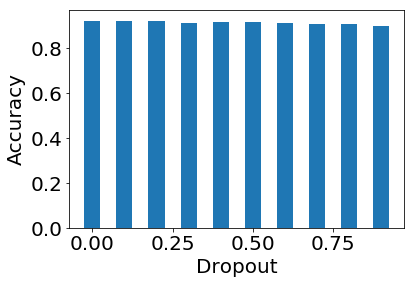

In [26]:
width = 0.05
plt.bar(dropouts, acc, width, align='center')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

plt.xlabel('Dropout', size = 20)
plt.ylabel('Accuracy',size = 20)
plt.show()

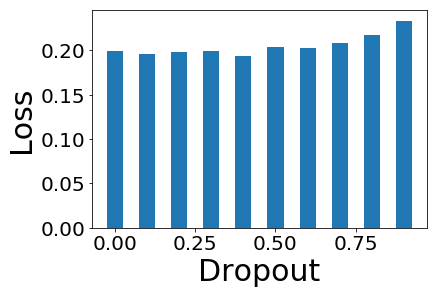

In [27]:
width = 0.05
plt.bar(dropouts, los, width, align='center')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

plt.xlabel('Dropout', size = 30)
plt.ylabel('Loss',size = 30)
plt.show()